<a href="https://colab.research.google.com/github/kiptuidenis/SKIES/blob/main/Animal_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Analysis**

In [2]:
# loading dataset from kaggle
# upload kaggle.json file
! pip install -q kaggle
from google.colab import files
print("Upload 'kaggle.json' file...")
files.upload()

# download the dataset(zipped folder) and unzip it
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download alessiocorrado99/animals10
! unzip animals10.zip

Upload 'kaggle.json' file...


Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [3]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import PIL
import os

In [4]:
# getting output class labels
class_labels = sorted(os.listdir('raw-img'))
print('\nOutput Class Labels: {}'.format(class_labels))


Output Class Labels: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [5]:
# getting number of output classes
num_classes = len(class_labels)
print('\nNumber of Output Classes: {}'.format(num_classes))


Number of Output Classes: 10


In [6]:
# Calculating total elements in each class
class_totals = [len(os.listdir('raw-img' + f"/{label}")) for label in class_labels]
print("\nTotal Elements in each class : {}".format(class_totals))


Total Elements in each class : [4863, 2623, 1446, 2112, 3098, 1668, 1866, 1820, 4821, 1862]


**Observations**

> There is a class imbalance in the dataset

> Cane and ragno classes are highly dominating with 4863 and 4821  elements respectively


> Elefante has the loweest number of elements. (1446)

<ipython-input-7-d30a10d66e46>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=class_totals, palette='viridis')


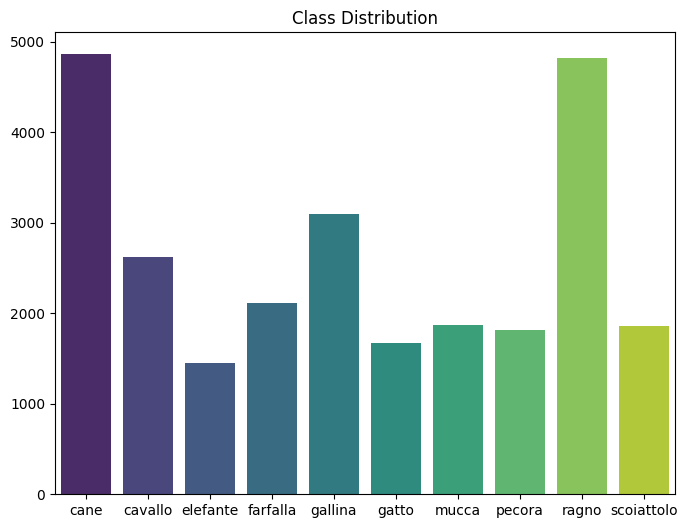

In [7]:
# plotting class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_labels, y=class_totals, palette='viridis')
plt.title('Class Distribution')
plt.show()

**Plotting Image Size Distribution**

It can be seen that images are of varyying sizes hence the need to resize them.

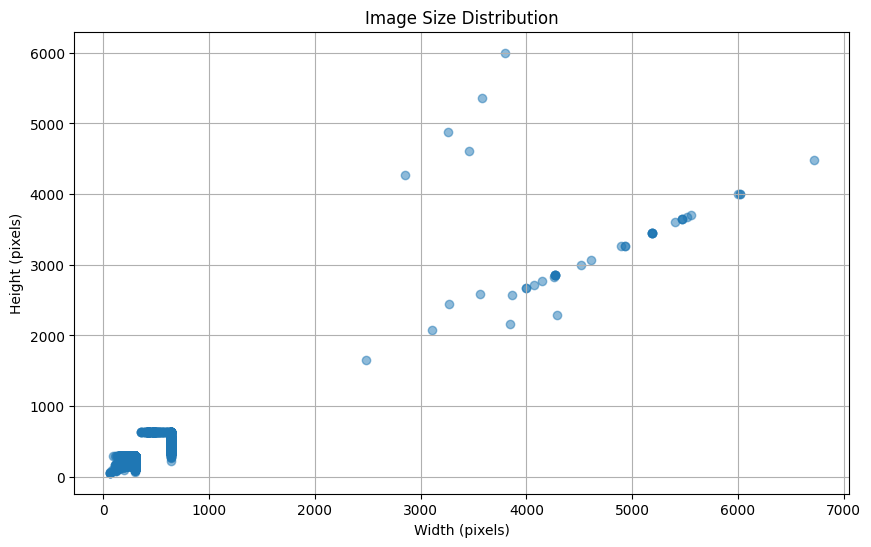

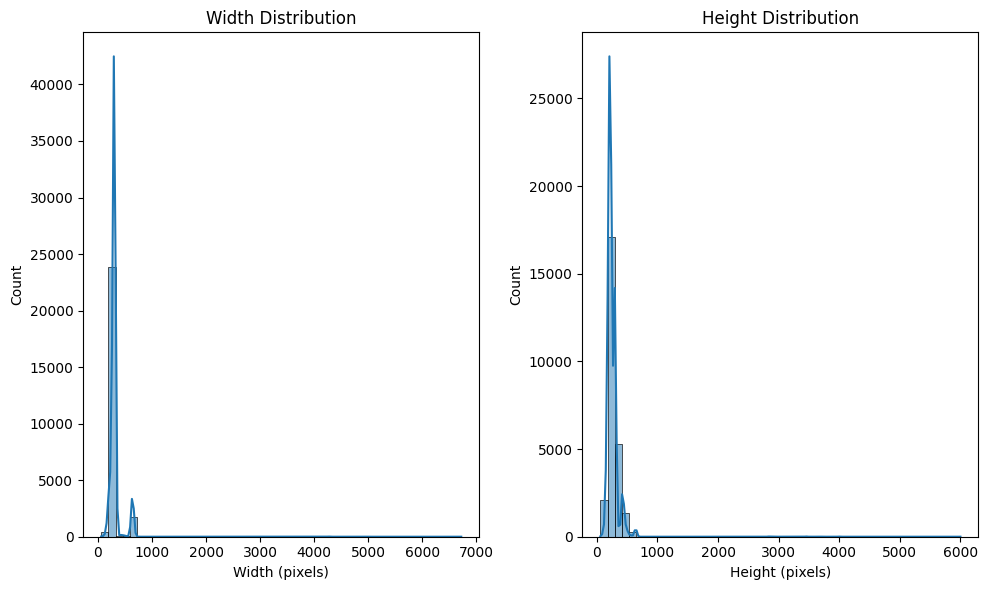

In [9]:
from PIL import Image
# Function to get image dimensions
def get_image_dimensions(image_path):
  try:
    with Image.open(image_path) as img:
      width, height = img.size
      return width, height
  except IOError:
    return None, None

# Collect image dimensions for all images
image_dimensions = []
for class_label in class_labels:
  class_path = os.path.join('raw-img', class_label)
  for image_name in os.listdir(class_path):
    image_path = os.path.join(class_path, image_name)
    width, height = get_image_dimensions(image_path)
    if width is not None and height is not None:
      image_dimensions.append((width, height))

# Separate widths and heights
widths, heights = zip(*image_dimensions)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Image Size Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True)
plt.show()

print("\n")
# Create histograms for width and height
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=50, kde=True)
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=50, kde=True)
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')

plt.tight_layout()
plt.show()

**Data Preparation**

In [10]:
from tqdm import tqdm
from skimage import io, color
from skimage.transform import resize
import numpy as np


In [11]:
dataset_path = "/content/raw-img"
img_size = (128, 128)

In [12]:
def load_images_skimage(dataset_path, img_size=(128, 128)):
    X = []  # Image data
    y = []  # Labels

    # Loop through each class folder inside the dataset root
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):  # Ensure it's a folder
            for img_name in tqdm(os.listdir(class_path), desc=f"Loading {class_name}"):
                img_path = os.path.join(class_path, img_name)

                # Read image
                try:
                    img = io.imread(img_path)
                    img = resize(img, img_size, anti_aliasing=True)  # Resize
                    img = color.rgb2gray(img)  # Convert to grayscale
                    X.append(img.flatten())  # Flatten into 1D array
                    y.append(class_name)  # Store class label
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_images_skimage(dataset_path, img_size)
# Check dataset shape
print("Dataset shape:", X.shape, y.shape)

Loading farfalla:   4%|▍         | 84/2112 [00:01<00:25, 78.22it/s]

Error loading image /content/raw-img/farfalla/eb32b40820fd043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:   5%|▍         | 103/2112 [00:01<00:24, 80.65it/s]

Error loading image /content/raw-img/farfalla/eb32b8072bfd043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:   7%|▋         | 146/2112 [00:01<00:22, 86.65it/s]

Error loading image /content/raw-img/farfalla/e830b30a20f5003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)
Error loading image /content/raw-img/farfalla/e830b30a20f6033ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  10%|█         | 219/2112 [00:02<00:21, 89.10it/s]

Error loading image /content/raw-img/farfalla/ea36b50f2cfc063ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  11%|█         | 228/2112 [00:02<00:22, 84.64it/s]

Error loading image /content/raw-img/farfalla/ea35b50b29f6003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  12%|█▏        | 249/2112 [00:02<00:21, 86.36it/s]

Error loading image /content/raw-img/farfalla/eb32b70f21f2033ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  24%|██▎       | 500/2112 [00:05<00:17, 92.30it/s]

Error loading image /content/raw-img/farfalla/eb32b40820fd063ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  26%|██▌       | 548/2112 [00:05<00:14, 104.55it/s]

Error loading image /content/raw-img/farfalla/eb35b30729f1073ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  29%|██▊       | 602/2112 [00:06<00:16, 89.38it/s]

Error loading image /content/raw-img/farfalla/eb35b3072dfd033ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)
Error loading image /content/raw-img/farfalla/e83db70e2cf0073ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  33%|███▎      | 693/2112 [00:07<00:16, 86.00it/s] 

Error loading image /content/raw-img/farfalla/eb32b6092bf0033ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)
Error loading image /content/raw-img/farfalla/e832b7062ff6093ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  35%|███▍      | 729/2112 [00:07<00:12, 107.72it/s]

Error loading image /content/raw-img/farfalla/eb32b70f21f2013ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  38%|███▊      | 793/2112 [00:08<00:11, 118.10it/s]

Error loading image /content/raw-img/farfalla/eb32b9062ff4073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  40%|████      | 854/2112 [00:09<00:12, 98.67it/s] 

Error loading image /content/raw-img/farfalla/eb33b5062afd033ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  44%|████▍     | 925/2112 [00:09<00:14, 80.99it/s]

Error loading image /content/raw-img/farfalla/ea37b4072af2093ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)
Error loading image /content/raw-img/farfalla/eb31b2092bfd043ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  46%|████▌     | 968/2112 [00:10<00:13, 84.46it/s]

Error loading image /content/raw-img/farfalla/eb32b70f21f2073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)
Error loading image /content/raw-img/farfalla/eb3db20b28fc043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  51%|█████     | 1075/2112 [00:11<00:11, 90.22it/s]

Error loading image /content/raw-img/farfalla/eb32b8072bfd033ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  55%|█████▍    | 1155/2112 [00:12<00:12, 75.97it/s]

Error loading image /content/raw-img/farfalla/eb35b30729f1043ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  61%|██████    | 1293/2112 [00:14<00:08, 93.92it/s]

Error loading image /content/raw-img/farfalla/eb35b3062ef3083ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  62%|██████▏   | 1313/2112 [00:14<00:09, 88.72it/s]

Error loading image /content/raw-img/farfalla/eb32b8072bfd053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)
Error loading image /content/raw-img/farfalla/eb32b6072cfc073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  68%|██████▊   | 1434/2112 [00:15<00:06, 98.09it/s] 

Error loading image /content/raw-img/farfalla/eb3db20b28f3093ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  71%|███████   | 1496/2112 [00:16<00:07, 83.19it/s]

Error loading image /content/raw-img/farfalla/eb35b3062efc003ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  74%|███████▎  | 1556/2112 [00:17<00:07, 76.95it/s]

Error loading image /content/raw-img/farfalla/eb32b8072bfc083ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)
Error loading image /content/raw-img/farfalla/eb32b6092afd043ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  78%|███████▊  | 1641/2112 [00:17<00:05, 90.23it/s]

Error loading image /content/raw-img/farfalla/eb30b60c28fd063ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  83%|████████▎ | 1746/2112 [00:19<00:03, 93.25it/s]

Error loading image /content/raw-img/farfalla/eb35b3072dfd003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  89%|████████▊ | 1873/2112 [00:20<00:03, 70.66it/s]

Error loading image /content/raw-img/farfalla/eb32b6072cfd003ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  91%|█████████▏| 1929/2112 [00:21<00:02, 91.23it/s]

Error loading image /content/raw-img/farfalla/e830b30a20f6053ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  92%|█████████▏| 1951/2112 [00:21<00:01, 86.14it/s]

Error loading image /content/raw-img/farfalla/eb32b8072bfd003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  97%|█████████▋| 2056/2112 [00:22<00:00, 87.11it/s]

Error loading image /content/raw-img/farfalla/eb30b40b28f7083ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla:  99%|█████████▊| 2085/2112 [00:22<00:00, 84.38it/s]

Error loading image /content/raw-img/farfalla/eb3cb00e21f4013ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)
Error loading image /content/raw-img/farfalla/eb32b6092afd033ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading farfalla: 100%|██████████| 2112/2112 [00:23<00:00, 91.30it/s]


Error loading image /content/raw-img/farfalla/eb3db20b28fc053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)
Error loading image /content/raw-img/farfalla/ea37b30620f6073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading gatto:  48%|████▊     | 807/1668 [02:56<00:37, 22.69it/s]

Error loading image /content/raw-img/gatto/e837b90a2ef7053ed1584d05fb1d4e9fe777ead218ac104497f5c979aee4b1bf_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading elefante:   9%|▉         | 127/1446 [00:01<00:14, 92.98it/s]

Error loading image /content/raw-img/elefante/e83db7072afd013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg: the input array must have size 3 along `channel_axis`, got (128, 128)


Loading elefante:  38%|███▊      | 552/1446 [00:06<00:09, 89.53it/s]

Error loading image /content/raw-img/elefante/e835b50620f0073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading elefante:  40%|███▉      | 573/1446 [00:06<00:10, 83.56it/s]

Error loading image /content/raw-img/elefante/ea35b80a2df1043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading elefante:  47%|████▋     | 680/1446 [00:07<00:08, 91.48it/s]

Error loading image /content/raw-img/elefante/ea34b10b21f5083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading elefante:  64%|██████▍   | 928/1446 [00:10<00:06, 83.31it/s]

Error loading image /content/raw-img/elefante/ea35b80a2df1033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading elefante:  67%|██████▋   | 974/1446 [00:11<00:06, 76.12it/s]

Error loading image /content/raw-img/elefante/e835b50620f7083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading elefante:  72%|███████▏  | 1036/1446 [00:11<00:04, 91.03it/s] 

Error loading image /content/raw-img/elefante/e835b50620f7093ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading elefante:  73%|███████▎  | 1055/1446 [00:12<00:05, 76.78it/s]

Error loading image /content/raw-img/elefante/eb36b70d2efd073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading elefante:  75%|███████▌  | 1088/1446 [00:12<00:04, 89.30it/s]

Error loading image /content/raw-img/elefante/ea35b80a2df1053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading elefante:  78%|███████▊  | 1131/1446 [00:12<00:03, 86.73it/s]

Error loading image /content/raw-img/elefante/e835b50620f0013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading ragno:  37%|███▋      | 1763/4821 [00:14<00:25, 121.15it/s]

Error loading image /content/raw-img/ragno/eb3cb3082af0073ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.png: the input array must have size 3 along `channel_axis`, got (128, 128, 4)


Loading scoiattolo: 100%|██████████| 1862/1862 [00:12<00:00, 144.95it/s]


Dataset shape: (26128, 16384) (26128,)


In [13]:
X.shape

(26128, 16384)

In [15]:
num_samples = X.shape[0]  # 26128
num_remove = 8000

# Generate random indices to remove
remove_indices = np.random.choice(num_samples, num_remove, replace=False)

# Remove selected indices (modifies X and y with a reduced copy)
X = np.delete(X, remove_indices, axis=0)
y = np.delete(y, remove_indices, axis=0)

# Check new shape
print(X.shape, y.shape)


(18128, 16384) (18128,)


PCA is needed because of too many features

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)